# 사전학습된 BERT

In [3]:
from transformers import TFBertModel, BertTokenizer

In [4]:
model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

C:\ProgramData\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ellyj\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [24]:
sentence = 'I love Seoul'
tokens = tokenizer.tokenize(sentence)
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

tokens = tokens + ['[PAD]'] + ['[PAD]']
print(tokens)

['[CLS]', 'i', 'love', 'seoul', '[SEP]']
['[CLS]', 'i', 'love', 'seoul', '[SEP]', '[PAD]', '[PAD]']


BERT는 padding-mask, positional embedding, segment embedding, token embedding을 입력받아야한다. 

In [25]:
segment_id=[0 for _ in range(len(tokens))]
print(segment_id)
attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
print(attention_mask)

[0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0]


In [26]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(token_ids)

[101, 1045, 2293, 10884, 102, 0, 0]


In [27]:
import numpy as np
token_ids_1 = np.array(token_ids)
token_ids=token_ids_1[np.newaxis,:]

segment_id1=np.array(segment_id)
segment_ids=segment_id1[np.newaxis,:]

attention_mask_1 = np.array(attention_mask)
attention_mask=attention_mask_1[np.newaxis,:]

In [31]:
attention_mask

array([[1, 1, 1, 1, 1, 0, 0]])

In [28]:
last_hidden_state, pooler_output, hidden_states = model(token_ids, token_type_ids=segment_ids,attention_mask = attention_mask)

## (1) last hidden state 
BERT의 마지막 encoderdml cnffur (batch, 시간스탭, 노드수)

In [ ]:
last_hidden_state.shape

concatenate

In [12]:
import tensorflow as tf
last_hidden_state_concat=tf.reshape(last_hidden_state,(1,-1))
print(last_hidden_state_concat.shape)

(1, 5376)


sum

In [13]:
last_hidden_state_sum=tf.reduce_sum(last_hidden_state, axis=1)
print(last_hidden_state_sum.shape)

(1, 768)


average

In [14]:
last_hidden_state_mean=tf.reduce_mean(last_hidden_state, axis=1)
print(last_hidden_state_mean.shape)

(1, 768)


## (2) pooler output
토큰 [CLS]에 대응하는 출력 embedding (= last_hidden_state[:,0,:])

In [15]:
pooler_output.shape

TensorShape([1, 768])

## (3) hidden states
model에 의한 출력으로 tuple 형태로 출력된다. 총 12개의 encoder로 구성되어있고, 입력층의 출력을 포함하여 총 13개의 출력으로 구성되어있다.

In [25]:
len(hidden_states)

13

In [17]:
hidden_states[0].shape

TensorShape([1, 7, 768])

In [18]:
hidden_states[1].shape

TensorShape([1, 7, 768])

In [26]:
hidden_states[12].shape

TensorShape([1, 7, 768])

In [27]:
hidden_states_mean=tf.reduce_mean(hidden_states[4:-1],axis=0)
print(hidden_states_mean.shape)

(1, 7, 768)


## BertTokenizer.from_pretrained

In [33]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [34]:
tokenizer('I love Paris')

{'input_ids': [101, 1045, 2293, 3000, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [22]:
tokenizer(['I love Paris', 'birds fly','snow fall'], padding = True, max_length=5)

{'input_ids': [[101, 1045, 2293, 3000, 102], [101, 5055, 4875, 102, 0], [101, 4586, 2991, 102, 0]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 0]]}

In [2]:
import numpy as np
from scipy.stats import norm
rv=norm(0,1)
x=np.arange(-4,4,0.01)
y=x*rv.cdf(x)

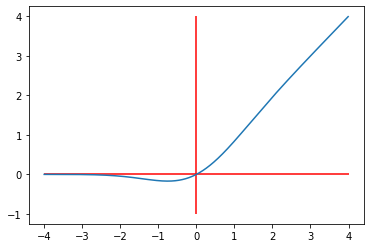

In [8]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.hlines(0,-4,4, color='red')
plt.vlines(0,-1,4, color='red')
plt.show()